<a href="https://colab.research.google.com/github/Ashu598/Feature-Extraction-PCA/blob/main/Feature_Extraction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloaded data from kaggle in Zip file, extracting the file and saving it in collab folder
import zipfile
zip_ref = zipfile.ZipFile('/content/train.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv("/content/train.csv")
df.sample(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9426,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
import matplotlib.pyplot as plt


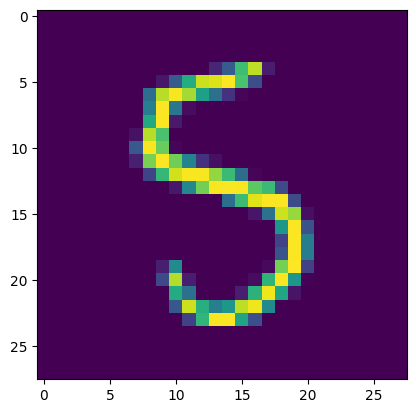

In [ ]:
plt.imshow(df.iloc[41283,1:].values.reshape(28,28))  #Check a random sample

In [ ]:
#deviding data into training and test
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
score = accuracy_score(y_pred, y_test)
score

0.9648809523809524

In above steps, we get a good accuracy scores with 784 feature.
Now with the help of PCA, we'll try to reduce the features and match the accuracy score.

In [ ]:
#In PCA, 1st step is data standarization or mean cenerization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
#n_components is the number of featured requreired,here "None" will result in 784 PCA
#If we take 100 in n_components, it reasults in the Top 100 principle components

X_train_withPCA = pca.fit_transform(X_train)
X_test_withPCA = pca.transform(X_test)

X_train_withPCA.shape

(33600, 100)

In [ ]:
#We'll again train a KNN model and check accuracy
knn = KNeighborsClassifier()

knn.fit(X_train_withPCA, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_withPCA = knn.predict(X_test_withPCA)
score = accuracy_score(y_pred_withPCA, y_test)
score

0.9536904761904762

We got almost same accuracy with 100 Principle components, instead of 784 feature.



In [ ]:
pca.explained_variance_
#explained_variance_ are the eigen values
#Since,we've taken n_components = 100, it wil result in 100 eigen values

array([40.67111198, 29.17023401, 26.74459621, 20.85344791, 18.14891878,
       15.85298249, 13.87108095, 12.48058955, 11.02794219, 10.09582463,
        9.63317775,  8.62785873,  8.06302959,  7.89511441,  7.44167543,
        7.17032628,  6.73265634,  6.62743251,  6.41497833,  6.25806481,
        5.90494271,  5.7651663 ,  5.52082045,  5.31994074,  5.18304714,
        4.93423579,  4.90640854,  4.7178607 ,  4.49802048,  4.43103641,
        4.32587509,  4.23454673,  4.10290016,  4.06671317,  4.02326394,
        3.84107984,  3.81823678,  3.71158798,  3.60816722,  3.47177458,
        3.42436542,  3.38757777,  3.28974522,  3.22733296,  3.21444863,
        3.15553478,  3.1240039 ,  3.10116282,  3.05692247,  3.03400258,
        2.96158049,  2.93721567,  2.86549133,  2.82077379,  2.79440906,
        2.77107675,  2.71294197,  2.68884792,  2.63968862,  2.62352768,
        2.54962369,  2.52994632,  2.48226428,  2.43688571,  2.41161393,
        2.36081549,  2.33561213,  2.3187809 ,  2.27594326,  2.24

In [ ]:
pca.components_

#components_ will show the eigen vectors
#Since,we've taken n_components = 100, it wil result in 100 eigen vectors

array([[-8.30641960e-18, -4.84009911e-18,  3.34166492e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.72005847e-18,  2.59800472e-18,  2.34953657e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.44950182e-17, -1.39678605e-17,  8.91310308e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.40473934e-17,  2.47825416e-17, -3.93305328e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.37404787e-18,  2.89722788e-17,  5.56842628e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.99737859e-17,  4.41165510e-18,  2.25059721e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
pca.components_.shape

(100, 784)

**Let's find out the optimum number of principle components:**

For this, we have to convert eigen values in percentage to undertand, how much variance in the data is explained by each eigen value. Now, we add the percentage of each eigen values unless we reach atleast 90%.

In [ ]:
pca.explained_variance_ratio_ * 100

array([5.78519225, 4.14926968, 3.80423901, 2.96626277, 2.58156168,
       2.25498018, 1.97306801, 1.77527996, 1.56865064, 1.43606318,
       1.37025477, 1.2272549 , 1.14691175, 1.12302695, 1.0585283 ,
       1.01993071, 0.9576751 , 0.94270772, 0.91248754, 0.89016765,
       0.8399384 , 0.82005615, 0.78529959, 0.75672581, 0.73725361,
       0.70186187, 0.69790363, 0.67108397, 0.63981317, 0.63028514,
       0.61532665, 0.6023358 , 0.58360996, 0.57846261, 0.57228225,
       0.54636778, 0.54311851, 0.52794844, 0.51323753, 0.49383659,
       0.48709296, 0.48186016, 0.46794414, 0.45906642, 0.45723371,
       0.44885361, 0.44436855, 0.44111956, 0.43482667, 0.43156647,
       0.42126491, 0.41779918, 0.40759688, 0.40123611, 0.3974859 ,
       0.39416704, 0.38589776, 0.38247054, 0.37547796, 0.37317917,
       0.36266683, 0.35986786, 0.35308541, 0.34663061, 0.34303587,
       0.33581013, 0.33222512, 0.32983099, 0.32373763, 0.31882472,
       0.31378036, 0.307645  , 0.30700468, 0.30065011, 0.29892

First Eigen value explains 5.78519225% variance in the data, Second  Eigen value explains 4.14926968% variance and so on.
**np.cumsum** can be used to find the cumulative sum.

In [ ]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 5.78519225,  9.93446193, 13.73870094, 16.70496371, 19.28652539,
       21.54150558, 23.51457359, 25.28985355, 26.85850418, 28.29456736,
       29.66482214, 30.89207703, 32.03898879, 33.16201573, 34.22054404,
       35.24047474, 36.19814985, 37.14085756, 38.0533451 , 38.94351275,
       39.78345115, 40.6035073 , 41.38880689, 42.1455327 , 42.88278631,
       43.58464818, 44.28255181, 44.95363578, 45.59344895, 46.22373409,
       46.83906074, 47.44139654, 48.02500651, 48.60346911, 49.17575136,
       49.72211915, 50.26523766, 50.7931861 , 51.30642363, 51.80026022,
       52.28735318, 52.76921334, 53.23715748, 53.6962239 , 54.15345761,
       54.60231122, 55.04667977, 55.48779933, 55.922626  , 56.35419247,
       56.77545738, 57.19325657, 57.60085344, 58.00208955, 58.39957545,
       58.79374249, 59.17964025, 59.56211079, 59.93758875, 60.31076792,
       60.67343475, 61.03330261, 61.38638801, 61.73301862, 62.07605449,
       62.41186462, 62.74408975, 63.07392074, 63.39765837, 63.71

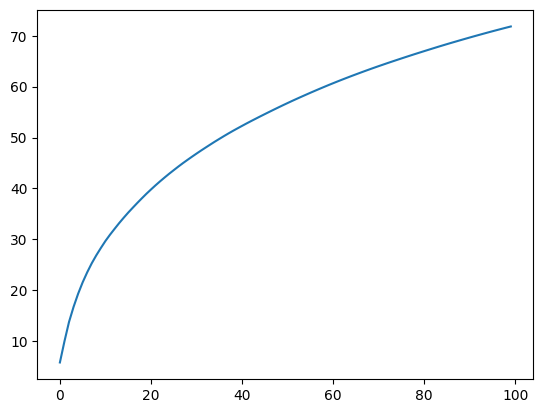

In [ ]:
#We can plot the data to see which is the optimal point
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

Since we have taken n_components = 100, it's explaining max 71.82042267% variance.